In [1]:
#problem statement- to forecast the alcohol sales for the next 12 months (1yr)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
alco_sales = pd.read_csv('Alcohol_Sales.csv')

In [4]:
alco_sales

,DATE,S4248SM144NCEN
0,1992-01-01,3459
1,1992-02-01,3458
2,1992-03-01,4002
3,1992-04-01,4564
4,1992-05-01,4221
...,...,...
320,2018-09-01,12396
321,2018-10-01,13914
322,2018-11-01,14174
323,2018-12-01,15504


In [5]:
alco_sales.isnull().sum()

DATE              0
S4248SM144NCEN    0
dtype: int64

In [6]:
alco_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325 entries, 0 to 324
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   DATE            325 non-null    object
 1   S4248SM144NCEN  325 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.2+ KB


In [7]:
alco_sales.DATE = pd.to_datetime(alco_sales.DATE, infer_datetime_format = True)

C:\Users\revad\AppData\Local\Temp\ipykernel_33252\331896642.py:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  alco_sales.DATE = pd.to_datetime(alco_sales.DATE, infer_datetime_format = True)


In [8]:
alco_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325 entries, 0 to 324
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   DATE            325 non-null    datetime64[ns]
 1   S4248SM144NCEN  325 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 5.2 KB


In [9]:
alco_sales = alco_sales.set_index(['DATE'])

In [10]:
alco_sales

,S4248SM144NCEN
DATE,
1992-01-01,3459
1992-02-01,3458
1992-03-01,4002
1992-04-01,4564
1992-05-01,4221
...,...
2018-09-01,12396
2018-10-01,13914
2018-11-01,14174


In [11]:
alco_sales['sales'] = alco_sales['S4248SM144NCEN']

In [12]:
alco_sales.drop(['S4248SM144NCEN'], axis=1, inplace=True)

In [13]:
alco_sales

,sales
DATE,
1992-01-01,3459
1992-02-01,3458
1992-03-01,4002
1992-04-01,4564
1992-05-01,4221
...,...
2018-09-01,12396
2018-10-01,13914
2018-11-01,14174


In [14]:
# It is a univariate time series. Now, to check for stationarity (our main assumption).

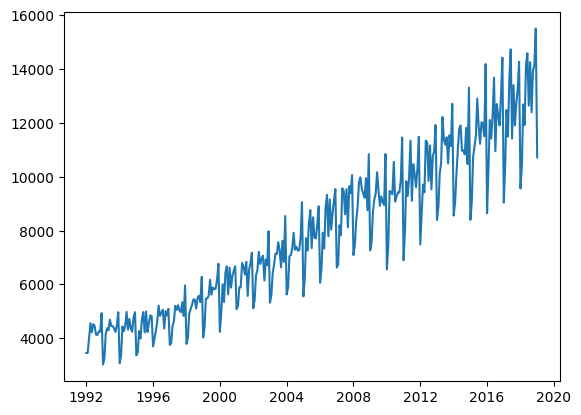

In [15]:
plt.plot(alco_sales)

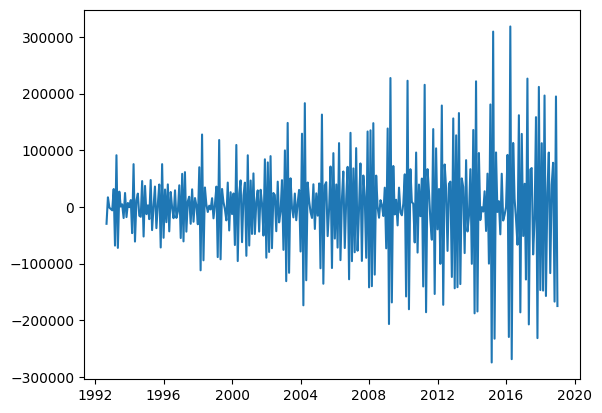

In [16]:
plt.plot(alco_sales.diff().diff().diff().diff().diff().diff().diff().diff())        #applying differencing technique

In [17]:
# Stationarity not found even at different levels of differencing

In [18]:
#So we take the log of the univariate timeseries

In [19]:
alco_sales_log = np.log(alco_sales)

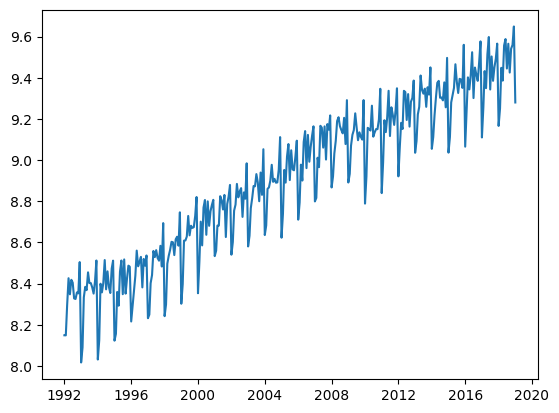

In [20]:
plt.plot(alco_sales_log)

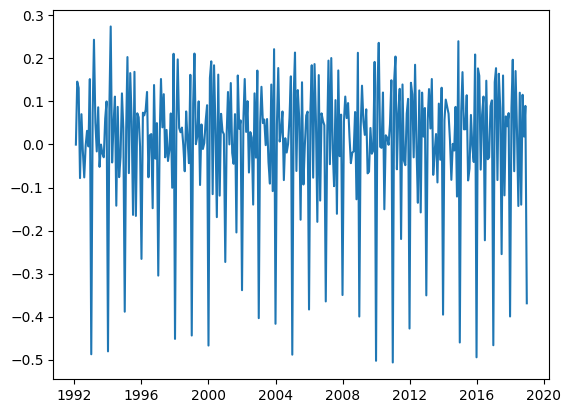

In [21]:
plt.plot(alco_sales_log.diff())

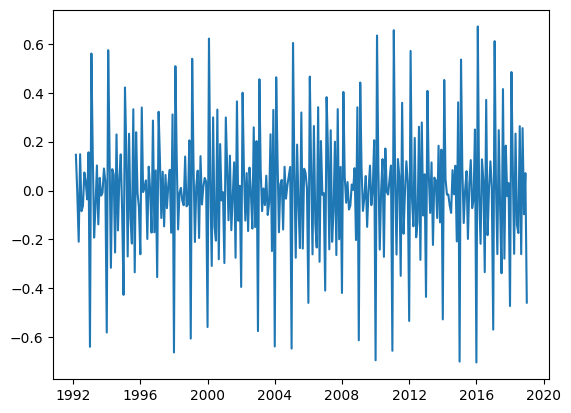

In [22]:
plt.plot(alco_sales_log.diff().diff())

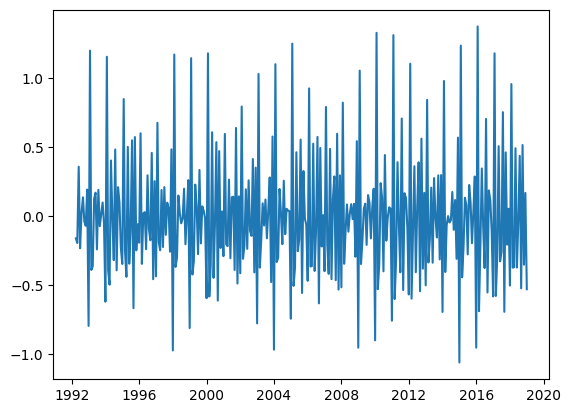

In [23]:
plt.plot(alco_sales_log.diff().diff().diff())

In [24]:
# Here, we get better stationarity at differencing level=2  rather than 3

In [25]:
# So we take d=2

In [26]:
# Now, to find p and q, using ACF,PACF

In [27]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

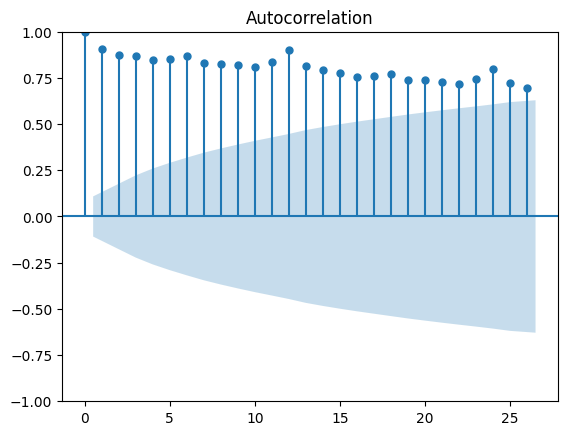

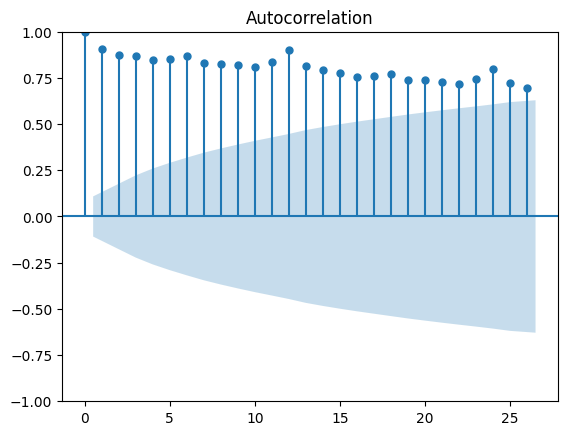

In [28]:
plot_acf(alco_sales_log)

In [29]:
# acf decays gradually and no stopping point found, so decision making will be difficult

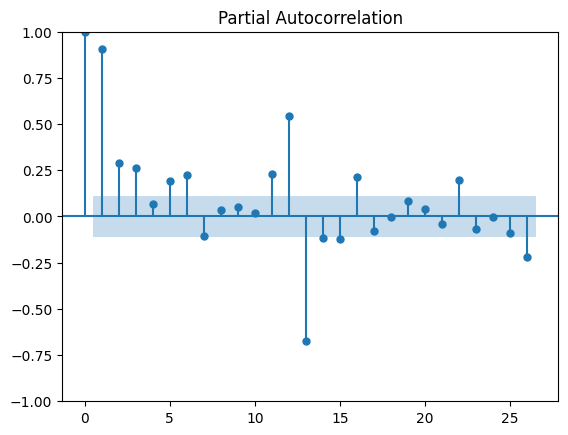

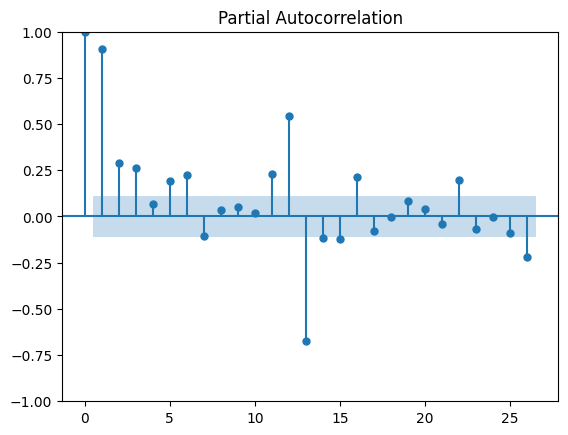

In [30]:
plot_pacf(alco_sales_log)

In [31]:
# pacf declines sharply. Stopping point is also found in pacf where the correlation is zero and acf decays slowly.
# p=7 , as after 7 lags, correlation=0  and it follows AR(7) process.

In [32]:
# Finally, we get p=7, d=2, q=0

In [33]:
# to check for seasonality

In [34]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [35]:
seasonal_check = seasonal_decompose(alco_sales_log)

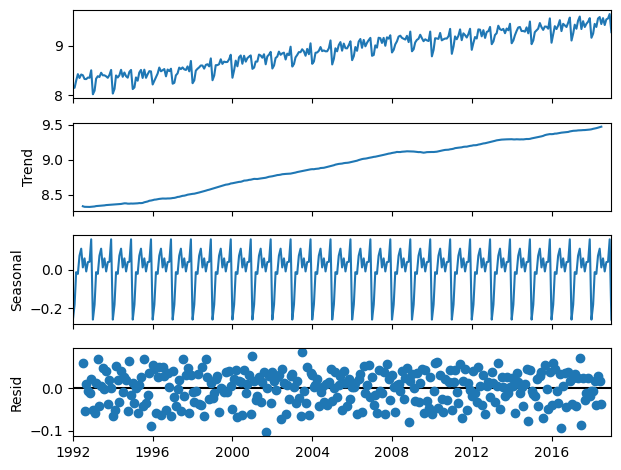

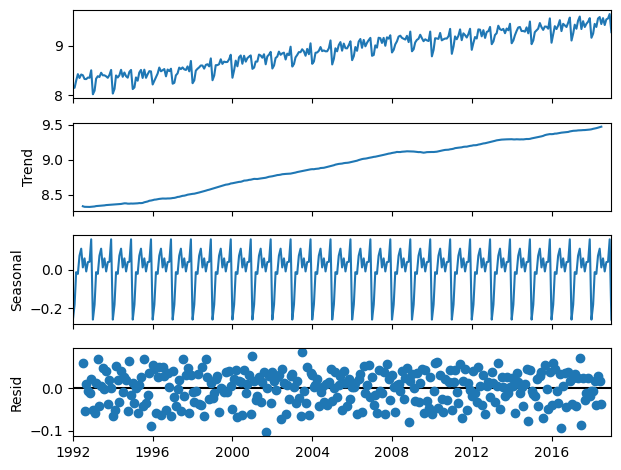

In [36]:
seasonal_check.plot()

In [37]:
# Patterns: Seasonality=True,  Trend=Uptrend

In [38]:
# Now, since we have seasonality, to build model on SARIMAX, we first need to use auto_arima

In [39]:
import pmdarima
from pmdarima import auto_arima

In [40]:
auto_arima(alco_sales_log, seasonal=True, m=12) # model is acquainted that pattern=seasonal, forecast_duration = m = 12 months

ARIMA(order=(2, 1, 3), scoring_args={}, seasonal_order=(2, 0, 2, 12),
      suppress_warnings=True)

In [41]:
# we get order and seasonal order from auto_arima

In [42]:
# Using this we build SARIMAX model

In [43]:
alco_sales_log

,sales
DATE,
1992-01-01,8.148735
1992-02-01,8.148446
1992-03-01,8.294550
1992-04-01,8.425955
1992-05-01,8.347827
...,...
2018-09-01,9.425129
2018-10-01,9.540651
2018-11-01,9.559165


In [44]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [45]:
sarimax = SARIMAX(alco_sales_log, order=(2,1,3), seasonal_order=(2,0,2,12))

D:\Software\Anaconda\envs\py310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
D:\Software\Anaconda\envs\py310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [46]:
sarimax_model = sarimax.fit()

D:\Software\Anaconda\envs\py310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [47]:
pred_values = sarimax_model.predict(start=325, end=336)
pred_values

2019-02-01    9.350938
2019-03-01    9.479099
2019-04-01    9.508934
2019-05-01    9.604362
2019-06-01    9.613620
2019-07-01    9.548829
2019-08-01    9.595926
2019-09-01    9.505266
2019-10-01    9.596010
2019-11-01    9.584173
2019-12-01    9.689326
2020-01-01    9.313237
Freq: MS, Name: predicted_mean, dtype: float64

In [48]:
pred_values1 = np.round(np.exp(pred_values))
pred_values1

2019-02-01    11510.0
2019-03-01    13083.0
2019-04-01    13480.0
2019-05-01    14829.0
2019-06-01    14967.0
2019-07-01    14028.0
2019-08-01    14705.0
2019-09-01    13430.0
2019-10-01    14706.0
2019-11-01    14533.0
2019-12-01    16144.0
2020-01-01    11084.0
Freq: MS, Name: predicted_mean, dtype: float64

In [ ]:
# Visualise the forecasting

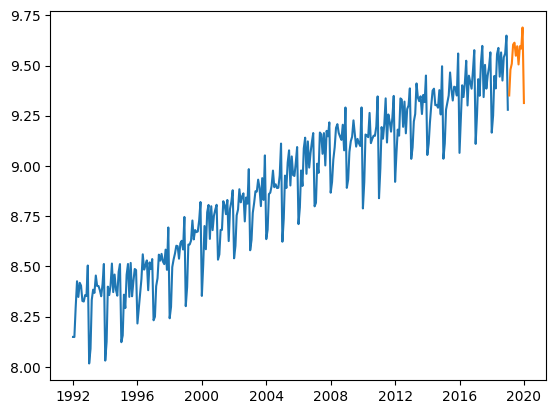

In [49]:
plt.plot(alco_sales_log)
plt.plot(pred_values)

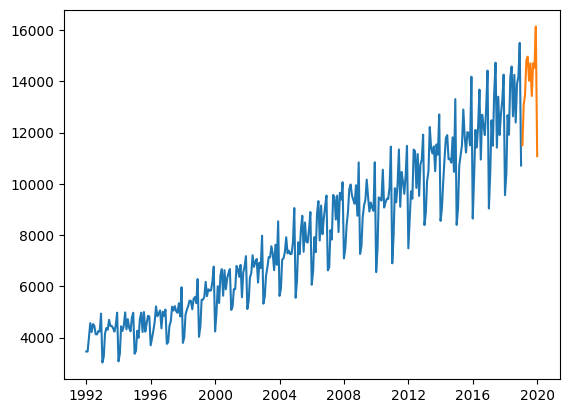

In [50]:
plt.plot(alco_sales['sales'])
plt.plot(pred_values1)

In [51]:
df = pd.DataFrame()

In [52]:
df['Predicted'] = pred_values1

In [54]:
df['Month'] = ['2019-02-01','2019-03-01','2019-04-01','2019-05-01','2019-06-01','2019-07-01','2019-08-01','2019-09-01','2019-10-01','2019-11-01','2019-12-01','2020-01-01']

In [55]:
df.Month = pd.to_datetime(df.Month, infer_datetime_format=True)

C:\Users\revad\AppData\Local\Temp\ipykernel_33252\3219359655.py:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df.Month = pd.to_datetime(df.Month, infer_datetime_format=True)


In [56]:
df

,Predicted,Month
2019-02-01,11510.0,2019-02-01
2019-03-01,13083.0,2019-03-01
2019-04-01,13480.0,2019-04-01
2019-05-01,14829.0,2019-05-01
2019-06-01,14967.0,2019-06-01
2019-07-01,14028.0,2019-07-01
2019-08-01,14705.0,2019-08-01
2019-09-01,13430.0,2019-09-01
2019-10-01,14706.0,2019-10-01
2019-11-01,14533.0,2019-11-01


<Axes: xlabel='DATE'>

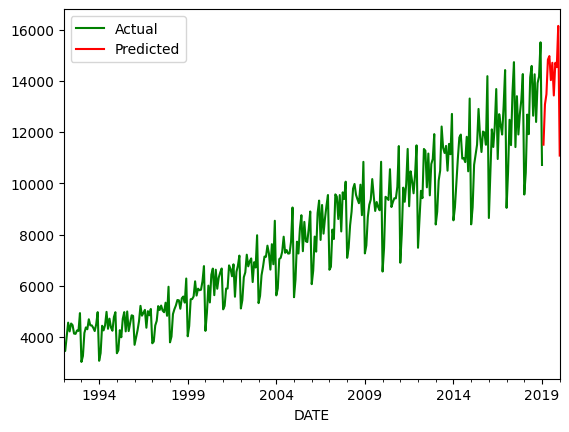

In [59]:
alco_sales['sales'].plot(legend=True, label='Actual', color='green')
df['Predicted'].plot(legend=True, label='Predicted', color='red')